# Project 2: Predicting Algae Growth

#### Dataset: https://www.kaggle.com/datasets/rukenmissonnier/research-on-algae-growth-in-the-laboratory

### Section 1- Preprocessing and Understanding Data

In [42]:
!pip install pandas numpy matplotlib seaborn scikit-learn

In [46]:
# Import relevant libraries
import pandas as pd
pd.plotting.register_matplotlib_converters()

import sklearn
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np

import seaborn as sns

In [48]:
# Load the relevant dataset into a pandas DataFrame
df = pd.read_csv("/Users/work/DataMining/algeas.csv")
df.head()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2,Population
0,1011.00,1.11,0.17,0.08,23.39,7.27,9.22,4736.51
1,1206.50,3.29,0.14,0.04,14.74,7.94,9.59,4677.34
2,1450.63,1.67,0.04,0.02,28.58,7.35,4.46,3388.85
3,1158.40,2.48,0.09,0.06,27.18,7.43,6.34,4899.17
4,1159.92,2.15,0.15,0.08,22.52,7.92,6.46,4974.25


In [88]:
df.tail()

,Light,Nitrate,Iron,Phosphate,Temperature,pH,CO2,Population
9779,368.58,4.94,0.08,0.02,14.34,7.61,3.21,2920.22
9780,1733.12,5.25,0.01,0.06,22.20,7.74,9.91,2093.47
9781,1898.45,1.90,0.11,0.05,18.53,7.39,7.78,777.25
9782,1832.10,6.08,0.15,0.13,22.63,7.04,4.77,1607.65
9783,467.72,7.71,0.12,0.06,11.52,7.37,3.05,3615.62


In [50]:
# Check for missing values in each column
print(df.isnull().sum())

Light          0
Nitrate        0
Iron           0
Phosphate      0
Temperature    0
pH             0
CO2            0
Population     0
dtype: int64


In [52]:
# Check for duplicate rows
print("Number of duplicate rows:", df.duplicated().sum())

Number of duplicate rows: 0


In [54]:
# Get information about data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9784 entries, 0 to 9783
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Light        9784 non-null   float64
 1   Nitrate      9784 non-null   float64
 2   Iron         9784 non-null   float64
 3   Phosphate    9784 non-null   float64
 4   Temperature  9784 non-null   float64
 5   pH           9784 non-null   float64
 6   CO2          9784 non-null   float64
 7   Population   9784 non-null   float64
dtypes: float64(8)
memory usage: 611.6 KB


In [84]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Light,9784.0,1026.172916,565.252246,40.25,539.925,1023.78,1516.085,2009.86
Nitrate,9784.0,4.493676,2.003815,1.00,2.760,4.53,6.210,8.00
Iron,9784.0,0.102977,0.056221,0.01,0.050,0.10,0.150,0.20
Phosphate,9784.0,0.105244,0.054843,0.01,0.060,0.11,0.150,0.20
Temperature,9784.0,19.974967,5.756035,10.00,14.960,20.01,25.000,29.99
pH,9784.0,7.502310,0.286528,7.00,7.260,7.50,7.750,8.00
CO2,9784.0,6.008941,2.299361,2.01,4.040,6.02,7.980,10.00
Population,9784.0,3161.595503,1460.094323,0.00,2055.460,3565.39,4374.555,5250.44


In [79]:
#Since this dataset is primarily numerical values, let's check for outliers
from scipy import stats

z_scores = np.abs(stats.zscore(df))
outliers = (z_scores > 3).sum(axis=0)  # Count outliers per column
print("Number of outliers per column:\n", outliers)

Number of outliers per column:
 [0 0 0 0 0 0 0 0]


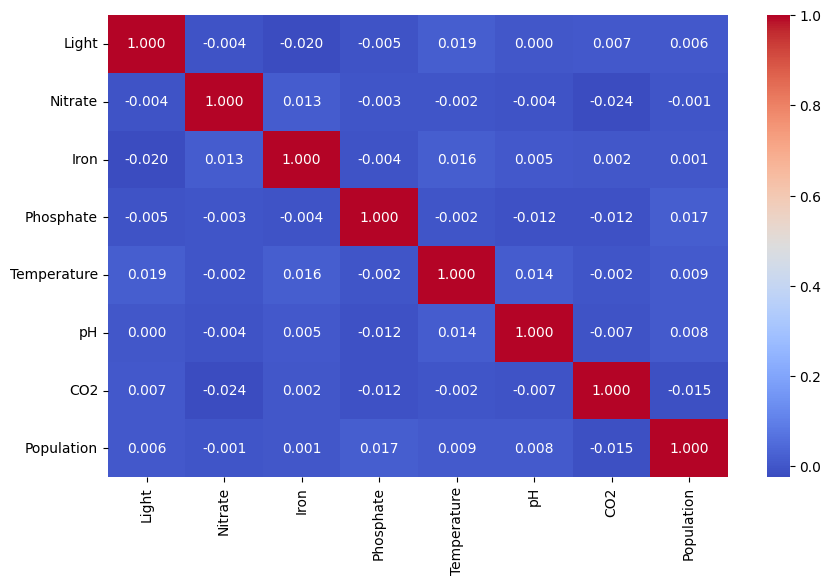

In [90]:
# Let's see how strongly each factor is related to the target variable, Algae Population
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".3f")
plt.show()

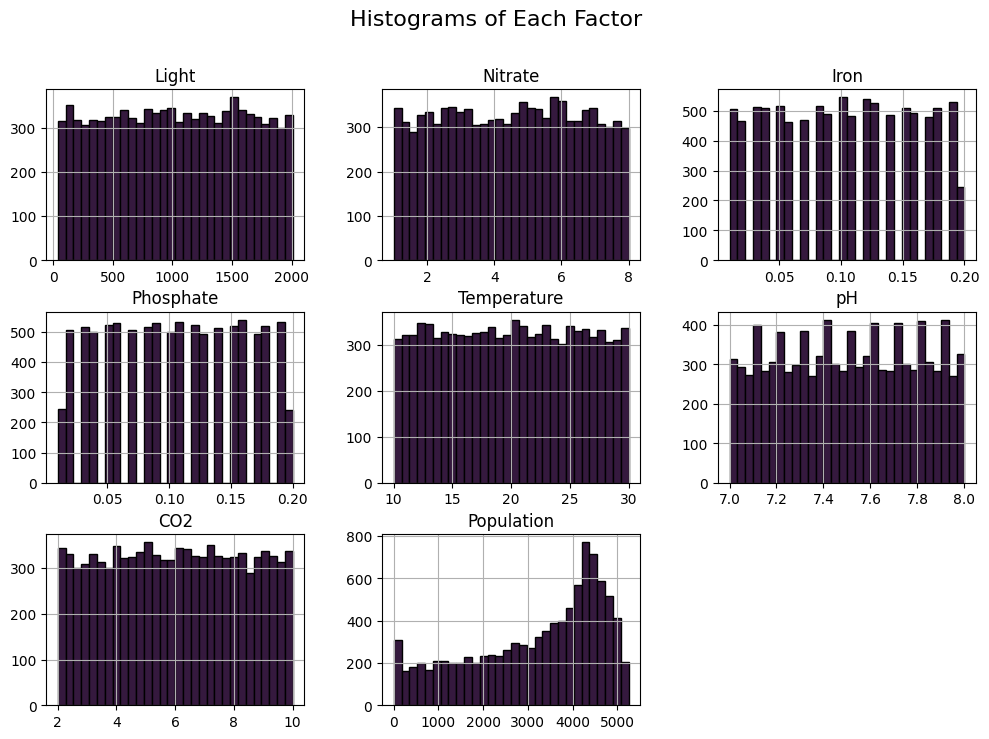

In [102]:
# Visualize each factor as a histogram
df.hist(figsize=(12,8), bins=30, edgecolor='black')
plt.suptitle("Histograms of Each Factor", fontsize=16)
plt.show()

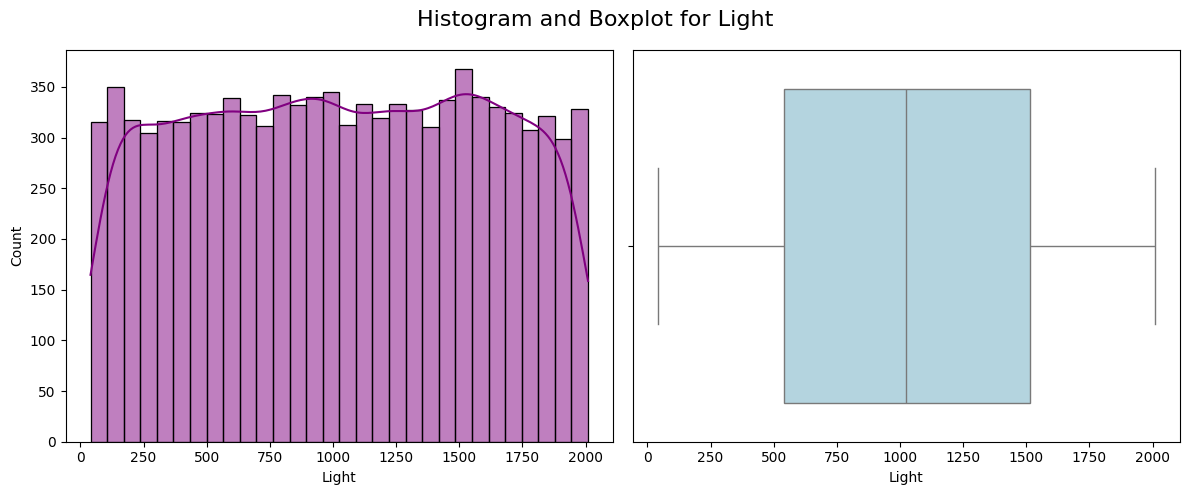

In [146]:
#Let's focus on each factor individually

plt.figure(figsize=(12, 5)) 

# Histogram for Light
plt.subplot(1, 2, 1)  
sns.histplot(df["Light"], bins=30, kde=True, color="purple")

#Boxplot for Light
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["Light"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for Light", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

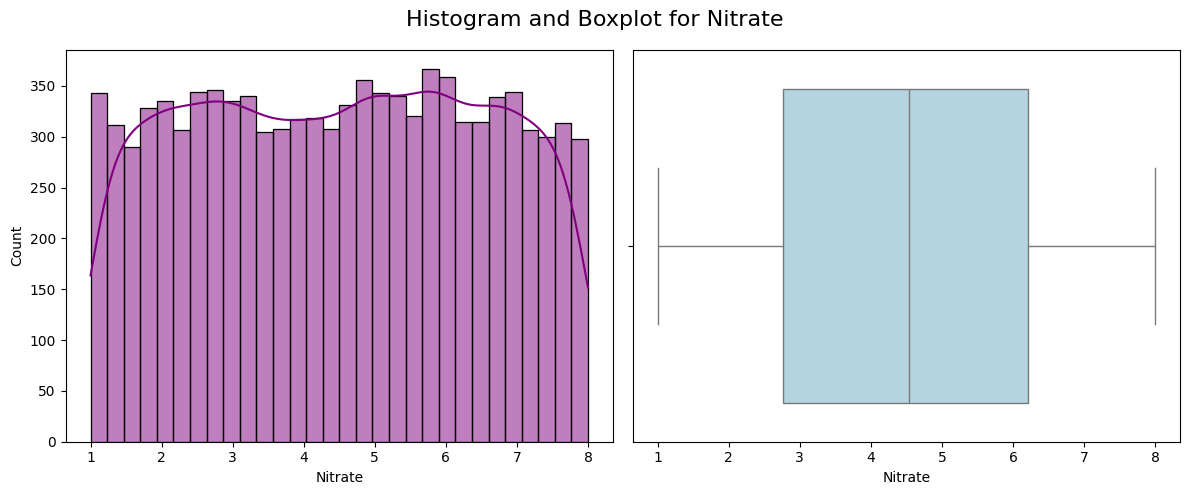

In [132]:
plt.figure(figsize=(12, 5)) 

# Histogram for Nitrate
plt.subplot(1, 2, 1)  
sns.histplot(df["Nitrate"], bins=30, kde=True, color="purple")

#Boxplot for Light
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["Nitrate"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for Nitrate", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

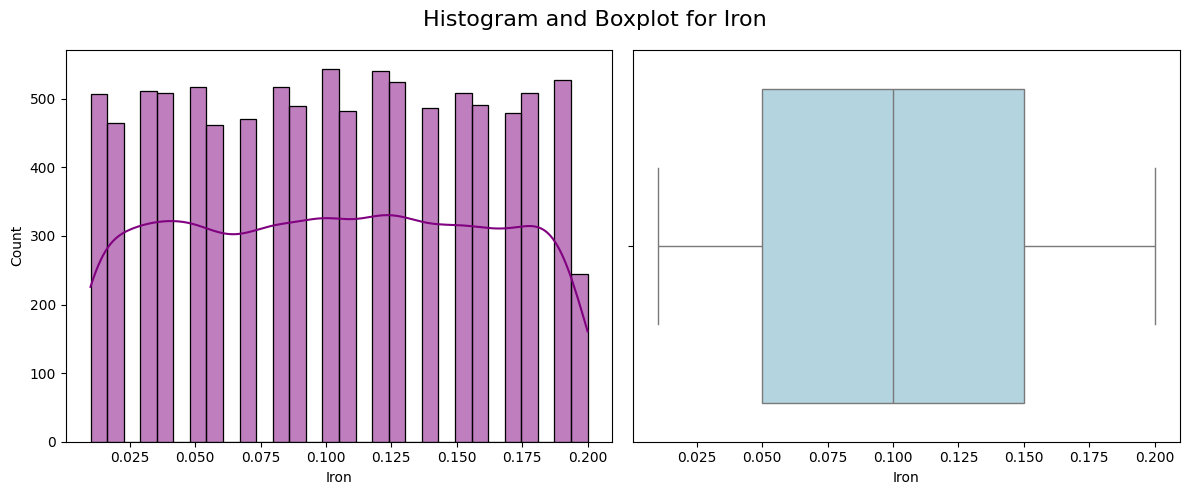

In [134]:
plt.figure(figsize=(12, 5)) 

# Histogram for Iron
plt.subplot(1, 2, 1)  
sns.histplot(df["Iron"], bins=30, kde=True, color="purple")

#Boxplot for Light
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["Iron"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for Iron", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

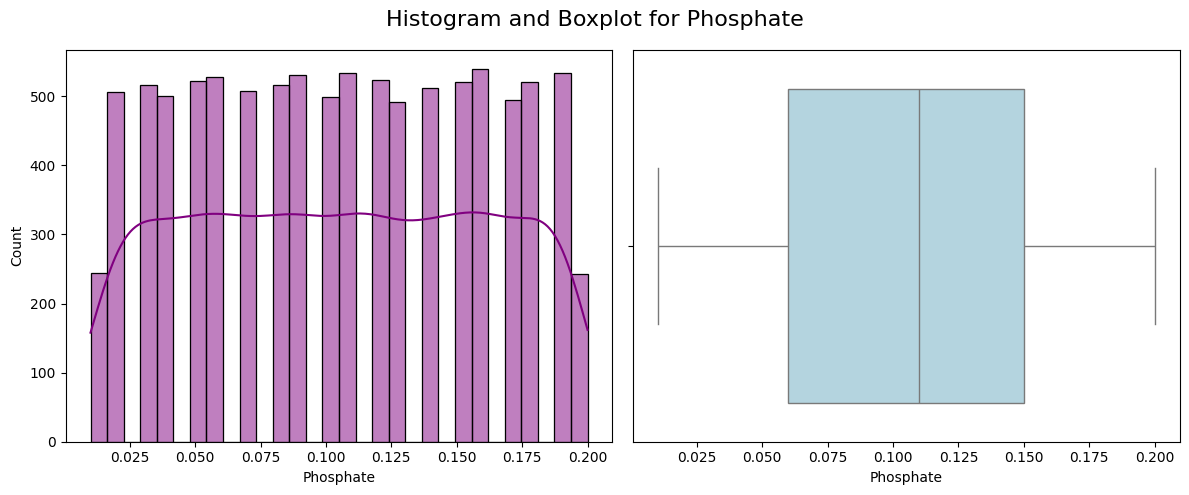

In [136]:
plt.figure(figsize=(12, 5)) 

# Histogram for Iron
plt.subplot(1, 2, 1)  
sns.histplot(df["Phosphate"], bins=30, kde=True, color="purple")

#Boxplot for Light
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["Phosphate"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for Phosphate", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

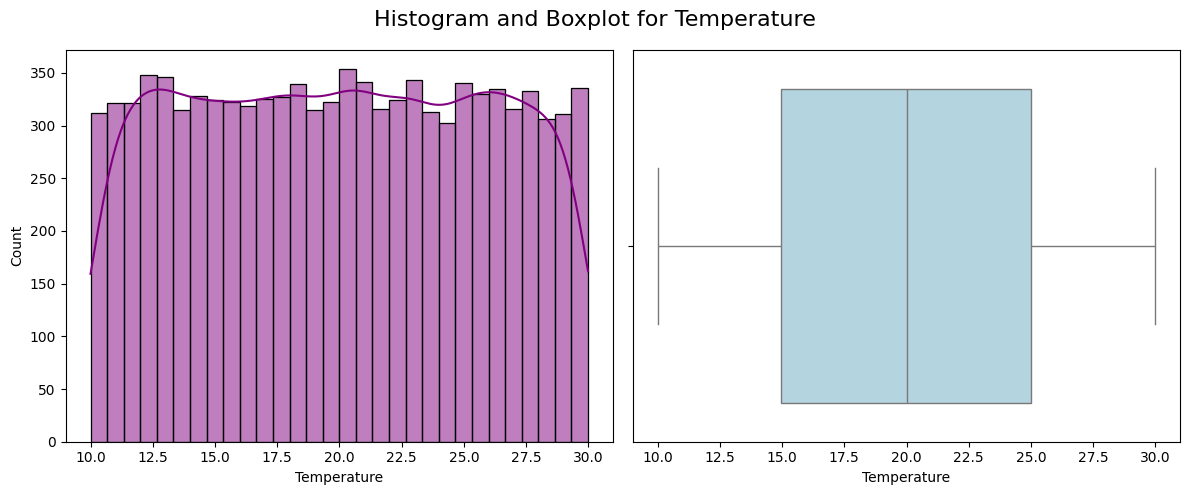

In [138]:
plt.figure(figsize=(12, 5)) 

# Histogram for Iron
plt.subplot(1, 2, 1)  
sns.histplot(df["Temperature"], bins=30, kde=True, color="purple")

#Boxplot for Light
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["Temperature"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for Temperature", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

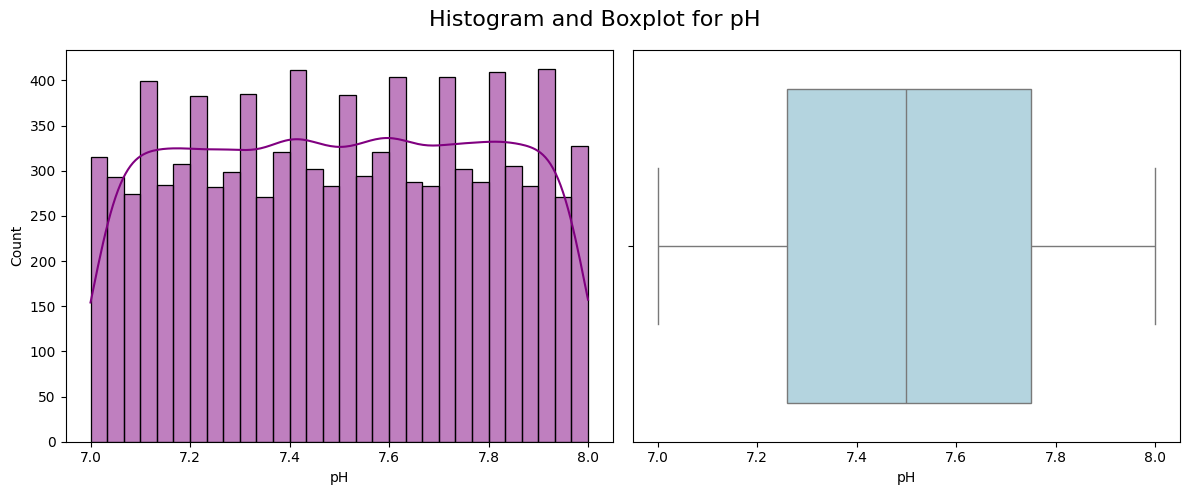

In [140]:
plt.figure(figsize=(12, 5)) 

# Histogram for Iron
plt.subplot(1, 2, 1)  
sns.histplot(df["pH"], bins=30, kde=True, color="purple")

#Boxplot for Light
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["pH"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for pH", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

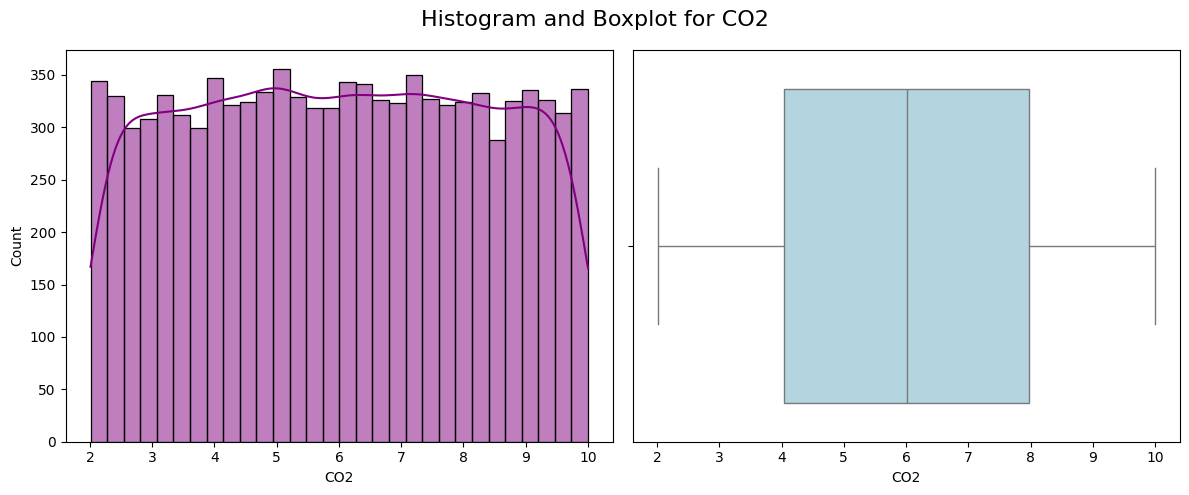

In [142]:
plt.figure(figsize=(12, 5)) 

# Histogram for Iron
plt.subplot(1, 2, 1)  
sns.histplot(df["CO2"], bins=30, kde=True, color="purple")

#Boxplot for Light
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["CO2"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for CO2", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

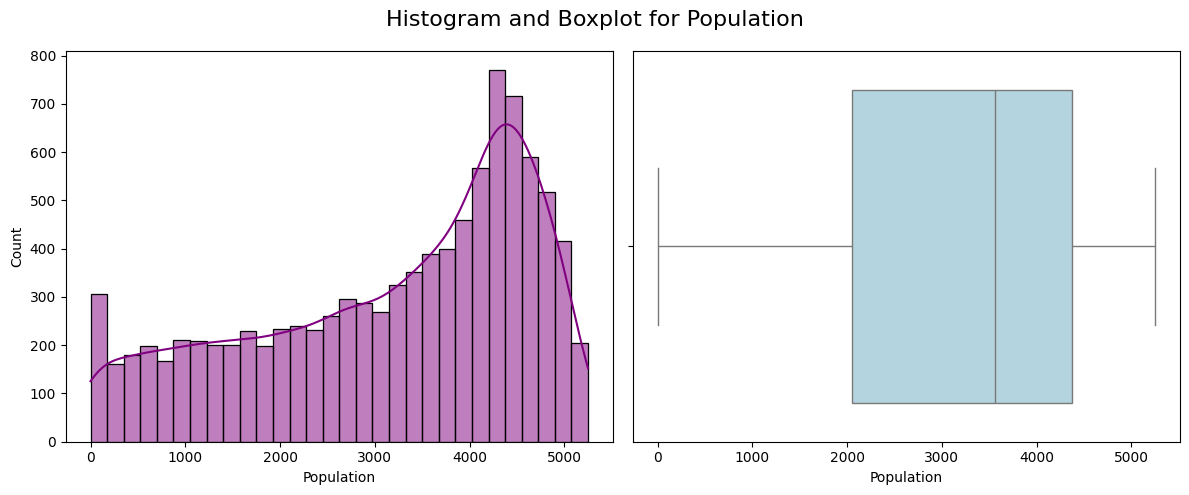

In [144]:
plt.figure(figsize=(12, 5)) 

# Histogram for Iron
plt.subplot(1, 2, 1)  
sns.histplot(df["Population"], bins=30, kde=True, color="purple")

#Boxplot for Light
plt.subplot(1, 2, 2)  
sns.boxplot(x=df["Population"], color="lightblue") 

plt.suptitle("Histogram and Boxplot for Population", fontsize=16)
plt.subplots_adjust(top=0.85)
plt.tight_layout()  
plt.show()

# Scale numerical features 
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [164]:
# Convert the target variable, Algae Population, which is now continuous into a categorical variable
df['Population_Class'] = pd.qcut(df['Population'], q=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

#Check the new column labels for the first 5 elements
print(df[['Population', 'Population_Class']].head())

#Check the distribution of values in each bin
print(df['Population_Class'].value_counts())

   Population Population_Class
0     4736.51        Very High
1     4677.34        Very High
2     3388.85           Medium
3     4899.17        Very High
4     4974.25        Very High
Population_Class
Very Low     1957
Low          1957
High         1957
Very High    1957
Medium       1956
Name: count, dtype: int64


In [166]:
#Let's create arrays for features and target
X = df.drop(['Population', 'Population_Class'], axis=1)  
y = df['Population_Class']

In [170]:
# Split data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.3, random_state=42)

In [172]:
# Create a Random Forest Classifier model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [176]:
# Train the model
y_pred = rf_model.predict(X_test)

In [178]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.72


In [180]:
# Show classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

        High       0.47      0.42      0.45       560
         Low       0.80      0.83      0.81       604
      Medium       0.70      0.71      0.70       572
   Very High       0.64      0.70      0.67       592
    Very Low       0.94      0.90      0.92       608

    accuracy                           0.72      2936
   macro avg       0.71      0.71      0.71      2936
weighted avg       0.72      0.72      0.72      2936



In [182]:
# Show confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
[[237   0  98 225   0]
 [  1 502  69   0  32]
 [ 95  67 405   5   0]
 [172   0   5 415   0]
 [  0  59   0   0 549]]
